In [5]:
# Import libreries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load the dataset
df = pd.read_csv('data_cleaned.csv')

# Display the first few rows of the dataset
df.head()

,ID Empleado,Año de Nacimiento,Edad,Sexo,Sexo Num,Fecha Inicio de Contrato,Fecha Hoy,Antigüedad Meses,Antigüedad Años,Formación Oficial Reglada,...,Rotación Interna,Salario Anual Inicial 2020,Salario Anual Actual 2020,Diferencia Salario,Experiencia previa (meses),Horas de formación recibidas,Neglicencias/Sanciones,Nuevas contrataciones 2020,NPS,Evaluación Desempeño
0,123,1959-02-26,61,Hombre,1,2016-03-16,2020-10-14,55.766667,4.647222,Grado Medio,...,0,26496,26496,0,284,0,5,0,6,6
1,119,2001-12-21,18,Mujer,0,2020-04-27,2020-10-14,5.666667,0.472222,Universitaria,...,0,17720,17720,0,47,0,5,1,7,8
2,85,1987-07-11,33,Mujer,0,2014-08-02,2020-10-14,75.500000,6.291667,Grado Medio,...,0,29686,29686,0,324,25,4,0,10,10
3,5,1963-11-07,56,Hombre,1,2015-09-08,2020-10-14,62.100000,5.175000,Bachillerato,...,0,19197,19197,0,114,6,4,0,4,7
4,67,1998-08-05,22,Hombre,1,2019-02-06,2020-10-14,20.533333,1.711111,ESO,...,0,18864,18864,0,18,18,4,0,4,5


In [7]:
# Display the information about the dataset
df.info()

# Display the summary statistics of the dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID Empleado                    311 non-null    int64  
 1   Año de Nacimiento              311 non-null    object 
 2   Edad                           311 non-null    int64  
 3   Sexo                           311 non-null    object 
 4   Sexo Num                       311 non-null    int64  
 5   Fecha Inicio de Contrato       311 non-null    object 
 6   Fecha Hoy                      311 non-null    object 
 7   Antigüedad Meses               311 non-null    float64
 8   Antigüedad Años                311 non-null    float64
 9   Formación Oficial Reglada      311 non-null    object 
 10  Formación Oficial Num          311 non-null    int64  
 11  ESTADO CIVIL                   311 non-null    object 
 12  HIJOS                          311 non-null    flo

,ID Empleado,Edad,Sexo Num,Antigüedad Meses,Antigüedad Años,Formación Oficial Num,HIJOS,Cat Lab num,Horas Jornada,FTE,...,Rotación Interna,Salario Anual Inicial 2020,Salario Anual Actual 2020,Diferencia Salario,Experiencia previa (meses),Horas de formación recibidas,Neglicencias/Sanciones,Nuevas contrataciones 2020,NPS,Evaluación Desempeño
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,...,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,156.000000,41.919614,0.514469,79.564845,6.630404,2.607717,0.634752,1.897106,32.554839,0.811254,...,0.118971,21936.270096,22096.967846,160.697749,109.964630,8.601286,0.205788,0.096463,7.122186,7.614148
std,89.922189,13.194695,0.500596,65.698471,5.474873,1.515662,0.841235,1.385067,8.383657,0.214612,...,0.324276,8600.599527,8648.780105,855.060405,106.716547,14.394730,0.784589,0.295701,1.983282,1.705492
min,1.000000,18.000000,0.000000,0.600000,0.050000,1.000000,0.000000,1.000000,20.000000,0.000000,...,0.000000,16017.000000,16017.000000,0.000000,3.000000,0.000000,0.000000,0.000000,4.000000,5.000000
25%,78.500000,31.000000,0.000000,35.833333,2.986111,1.000000,0.000000,1.000000,24.000000,0.600000,...,0.000000,17457.500000,17514.500000,0.000000,37.500000,0.000000,0.000000,0.000000,6.000000,6.000000
50%,156.000000,43.000000,1.000000,62.100000,5.175000,2.000000,0.000000,1.000000,40.000000,1.000000,...,0.000000,18960.000000,19035.000000,0.000000,67.000000,0.000000,0.000000,0.000000,7.000000,8.000000
75%,233.500000,53.000000,1.000000,94.433333,7.869444,4.000000,1.000000,2.000000,40.000000,1.000000,...,0.000000,22490.000000,22987.500000,0.000000,150.000000,12.000000,0.000000,0.000000,9.000000,9.000000
max,311.000000,64.000000,1.000000,252.633333,21.052778,6.000000,4.000000,7.000000,40.000000,1.000000,...,1.000000,66273.000000,66273.000000,7540.000000,460.000000,50.000000,5.000000,1.000000,10.000000,10.000000


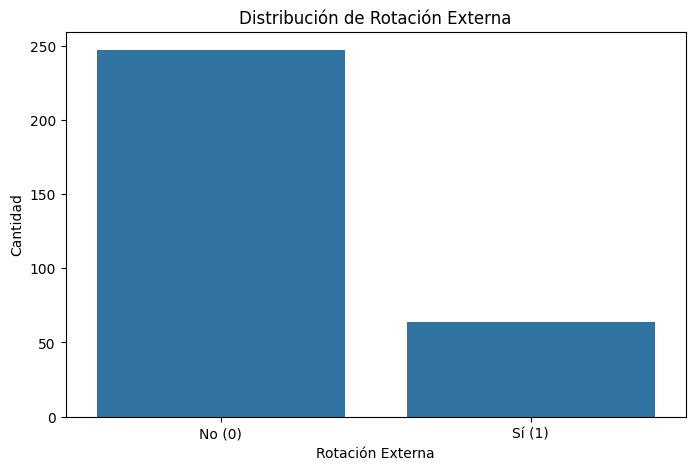

Distribución de la variable objetivo:
Rotación Externa
0    247
1     64
Name: count, dtype: int64
Porcentaje de rotación: 20.58%


In [8]:
# Verificar el balance de clases
plt.figure(figsize=(8, 5))
rotacion_counts = df['Rotación Externa'].value_counts()
sns.barplot(x=rotacion_counts.index, y=rotacion_counts.values)
plt.title('Distribución de Rotación Externa')
plt.xlabel('Rotación Externa')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No (0)', 'Sí (1)'])
plt.show()

print("Distribución de la variable objetivo:")
print(df['Rotación Externa'].value_counts())
print(f"Porcentaje de rotación: {df['Rotación Externa'].mean()*100:.2f}%")

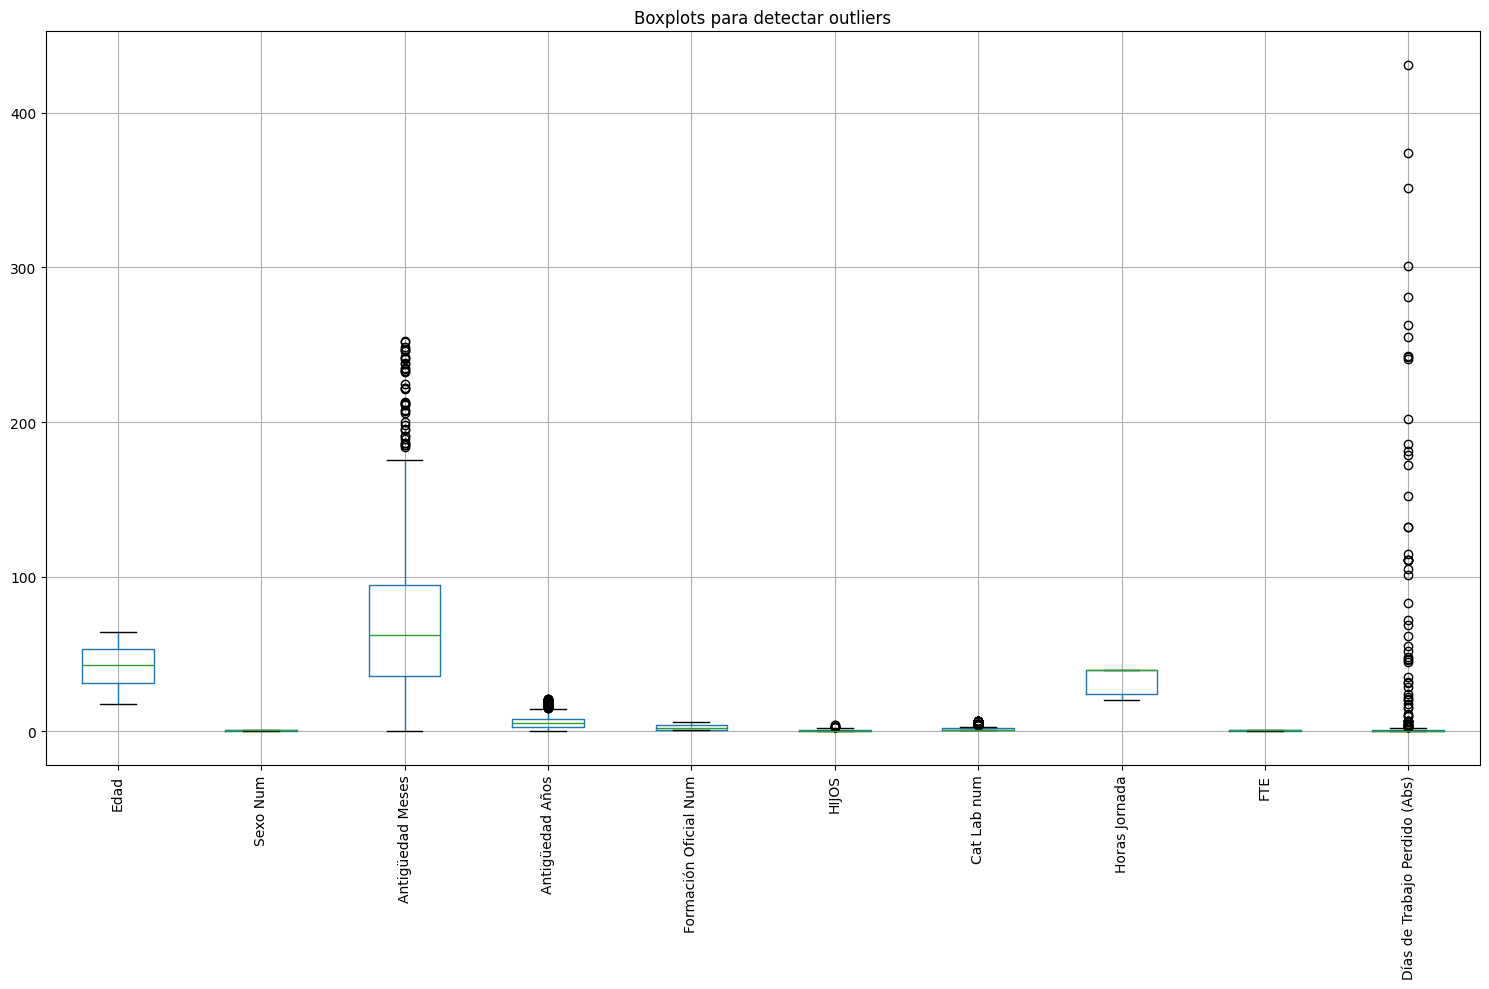

In [9]:
# Seleccionar columnas numéricas (excluyendo variables de identificación)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'ID Empleado' in numeric_cols:
    numeric_cols.remove('ID Empleado')

# Visualizar outliers en las principales variables numéricas
plt.figure(figsize=(15, 10))
df[numeric_cols[:10]].boxplot(figsize=(15, 8))
plt.title('Boxplots para detectar outliers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Tratar outliers (aplicando winsorization a las variables importantes)
def winsorize(data, column, limits=(0.05, 0.05)):
    lower = np.quantile(data[column], limits[0])
    upper = np.quantile(data[column], 1 - limits[1])
    data[column] = np.clip(data[column], lower, upper)
    return data

# Aplicar a variables con outliers significativos
for col in ['Antigüedad Meses', 'Experiencia previa (meses)', 'Salario Anual Actual 2020']:
    if col in df.columns:
        df = winsorize(df, col)


Variables más correlacionadas con Rotación Externa:
Neglicencias/Sanciones        0.516102
Nuevas contrataciones 2020    0.399432
Fecha Inicio de Contrato      0.252237
Año de Nacimiento             0.205391
Edad                          0.204586
Rotación Interna              0.187054
Antigüedad Años               0.173662
Antigüedad Meses              0.172381
Sexo Num                      0.110220
Sexo                          0.110220
dtype: float64

Top 10 variables según Random Forest:
                       Feature  Importance
25      Neglicencias/Sanciones    0.219899
6              Antigüedad Años    0.097169
5             Antigüedad Meses    0.088349
4     Fecha Inicio de Contrato    0.086072
0            Año de Nacimiento    0.057063
20  Salario Anual Inicial 2020    0.045641
23  Experiencia previa (meses)    0.040044
1                         Edad    0.039030
21   Salario Anual Actual 2020    0.038523
26  Nuevas contrataciones 2020    0.031832

Top 10 variables según ANOVA 

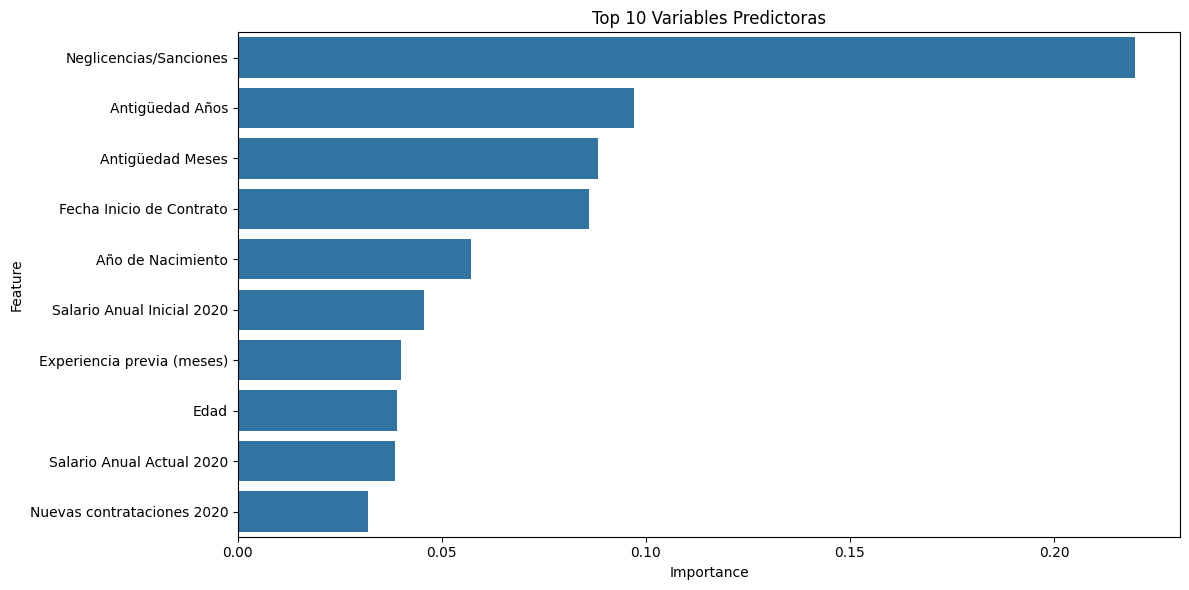

In [10]:
# Preparar datos
X = df.drop('Rotación Externa', axis=1)
y = df['Rotación Externa']

# Eliminar variables no predictivas o redundantes
cols_to_drop = ['ID Empleado', 'Fecha Hoy']
X = X.drop([col for col in cols_to_drop if col in X.columns], axis=1)

# Convertir variables categóricas
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = X[col].astype('category').cat.codes

# Método 1: Correlación con variable objetivo
correlation = X.corrwith(y).abs().sort_values(ascending=False)
print("\nVariables más correlacionadas con Rotación Externa:")
print(correlation.head(10))

# Método 2: Importancia según Random Forest
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X, y)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_selector.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 variables según Random Forest:")
print(feature_importance.head(10))

# Método 3: Análisis ANOVA para selección de características
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("\nTop 10 variables según ANOVA F-test:")
print(selected_features)

# Seleccionar las 10 características más importantes (combinando métodos)
important_features = feature_importance['Feature'][:10].tolist()
X_selected = X[important_features]

# Visualizar importancia de variables
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Variables Predictoras')
plt.tight_layout()
plt.show()

In [11]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42, stratify=y
)

# Normalizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar balance de clases en conjunto de entrenamiento
print("\nBalance de clases en training:")
print(y_train.value_counts())
print(f"Porcentaje de clase minoritaria: {y_train.mean()*100:.2f}%")

# Aplicar SMOTE para balancear clases
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("\nBalance de clases después de SMOTE:")
print(pd.Series(y_train_balanced).value_counts())


Balance de clases en training:
Rotación Externa
0    172
1     45
Name: count, dtype: int64
Porcentaje de clase minoritaria: 20.74%

Balance de clases después de SMOTE:
Rotación Externa
0    172
1    172
Name: count, dtype: int64



--- Evaluación del modelo: Regresión Logística ---
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        75
           1       0.88      0.74      0.80        19

    accuracy                           0.93        94
   macro avg       0.91      0.86      0.88        94
weighted avg       0.92      0.93      0.92        94



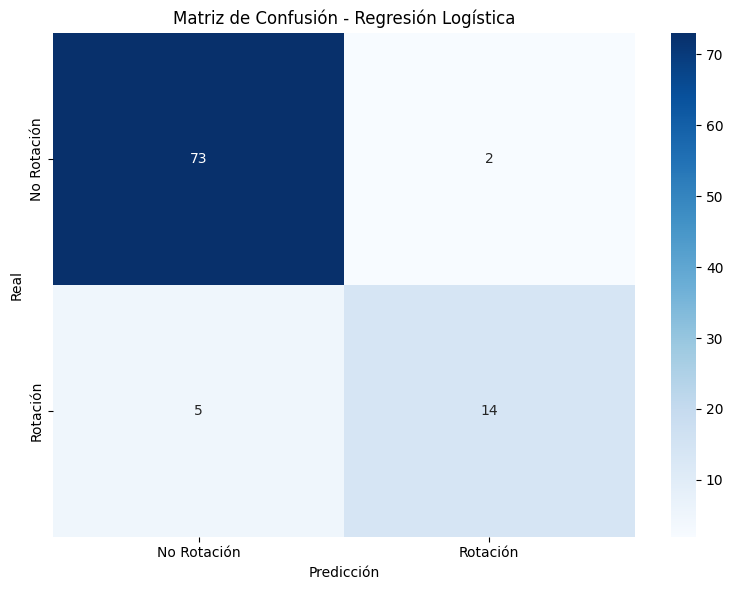

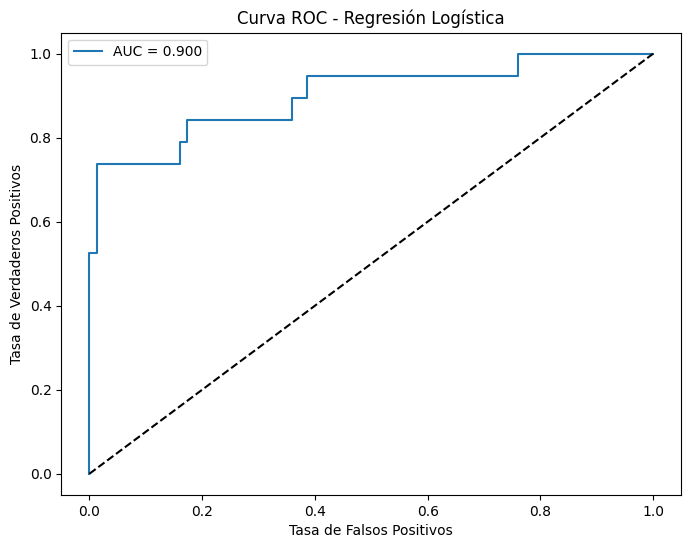

Validación cruzada (F1-score): 0.761 ± 0.037

--- Evaluación del modelo: Random Forest ---
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        75
           1       0.75      0.79      0.77        19

    accuracy                           0.90        94
   macro avg       0.85      0.86      0.85        94
weighted avg       0.91      0.90      0.91        94



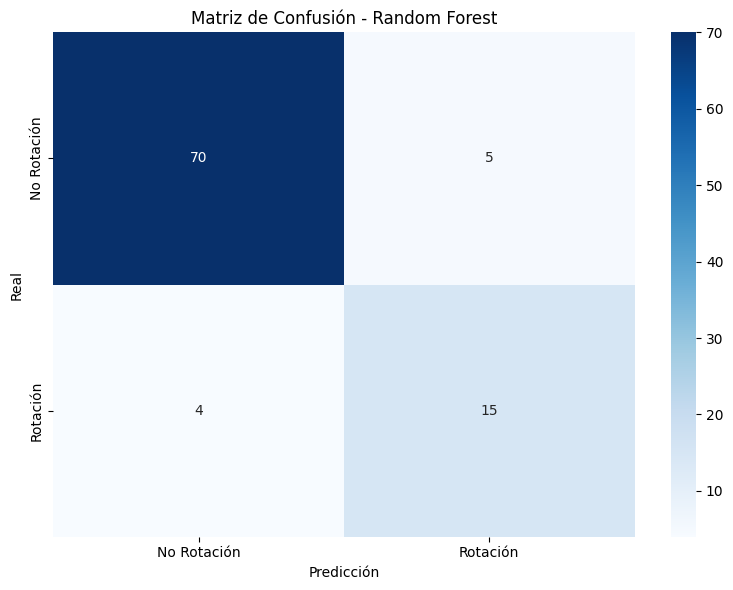

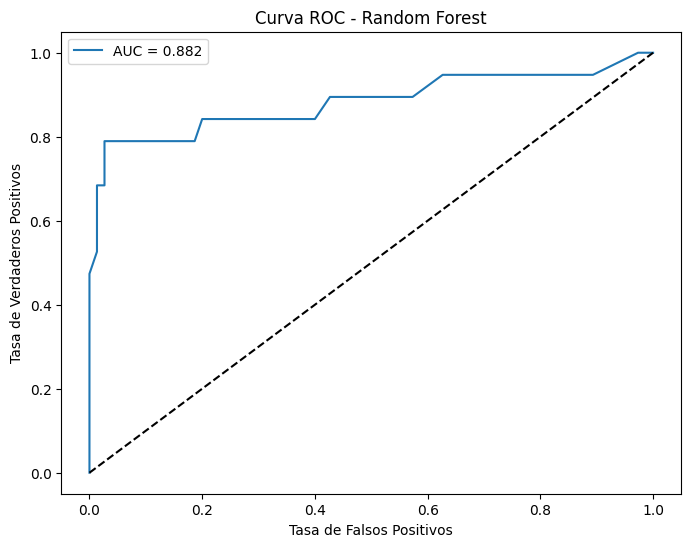

Validación cruzada (F1-score): 0.893 ± 0.036

--- Evaluación del modelo: Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        75
           1       0.68      0.79      0.73        19

    accuracy                           0.88        94
   macro avg       0.81      0.85      0.83        94
weighted avg       0.89      0.88      0.89        94



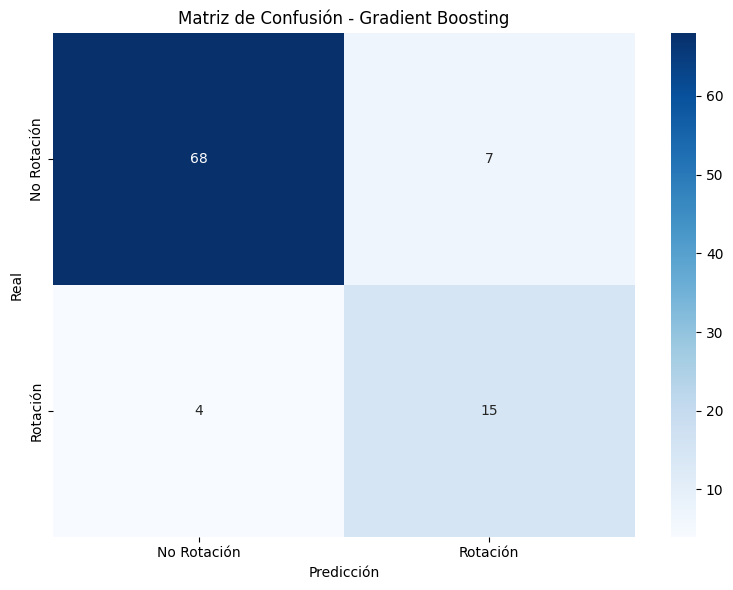

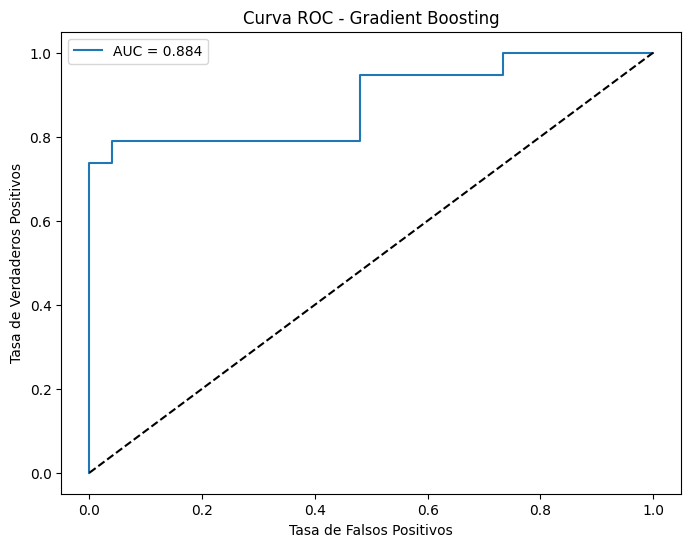

Validación cruzada (F1-score): 0.877 ± 0.034

--- Comparación de Modelos ---
                Modelo  Accuracy       AUC   F1 (CV)
1        Random Forest  0.904255  0.882105  0.893119
2    Gradient Boosting  0.882979  0.883509  0.876950
0  Regresión Logística  0.925532  0.900351  0.760725


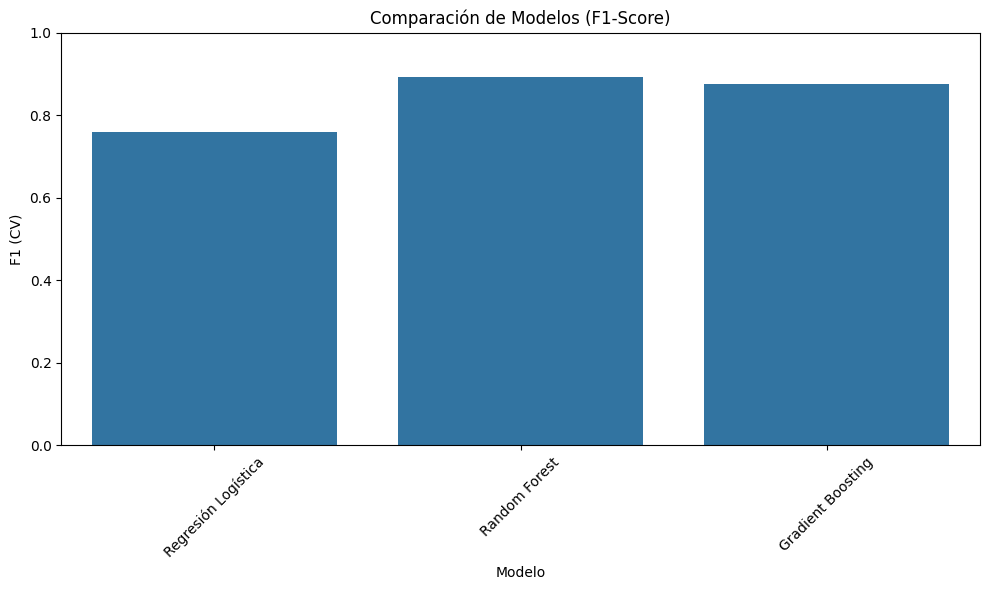

In [12]:
# Función para evaluar modelos
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Entrenamiento
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Métricas
    print(f"\n--- Evaluación del modelo: {model_name} ---")
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Rotación', 'Rotación'],
                yticklabels=['No Rotación', 'Rotación'])
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.ylabel('Real')
    plt.xlabel('Predicción')
    plt.tight_layout()
    plt.show()
    
    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend()
    plt.show()
    
    # Validación cruzada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    print(f"Validación cruzada (F1-score): {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
    
    return {
        'model': model,
        'accuracy': (y_pred == y_test).mean(),
        'auc': auc,
        'f1_cv': cv_scores.mean()
    }

# Modelo 1: Regresión Logística
log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
log_results = evaluate_model(log_reg, X_train_balanced, y_train_balanced, 
                             X_test_scaled, y_test, "Regresión Logística")

# Modelo 2: Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_results = evaluate_model(rf_clf, X_train_balanced, y_train_balanced, 
                            X_test_scaled, y_test, "Random Forest")

# Modelo 3: Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)
gb_results = evaluate_model(gb_clf, X_train_balanced, y_train_balanced, 
                            X_test_scaled, y_test, "Gradient Boosting")

# Comparar resultados
results_df = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [log_results['accuracy'], rf_results['accuracy'], gb_results['accuracy']],
    'AUC': [log_results['auc'], rf_results['auc'], gb_results['auc']],
    'F1 (CV)': [log_results['f1_cv'], rf_results['f1_cv'], gb_results['f1_cv']]
})

print("\n--- Comparación de Modelos ---")
print(results_df.sort_values('F1 (CV)', ascending=False))

# Visualizar comparación
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='F1 (CV)', data=results_df)
plt.title('Comparación de Modelos (F1-Score)')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El mejor modelo es: Random Forest


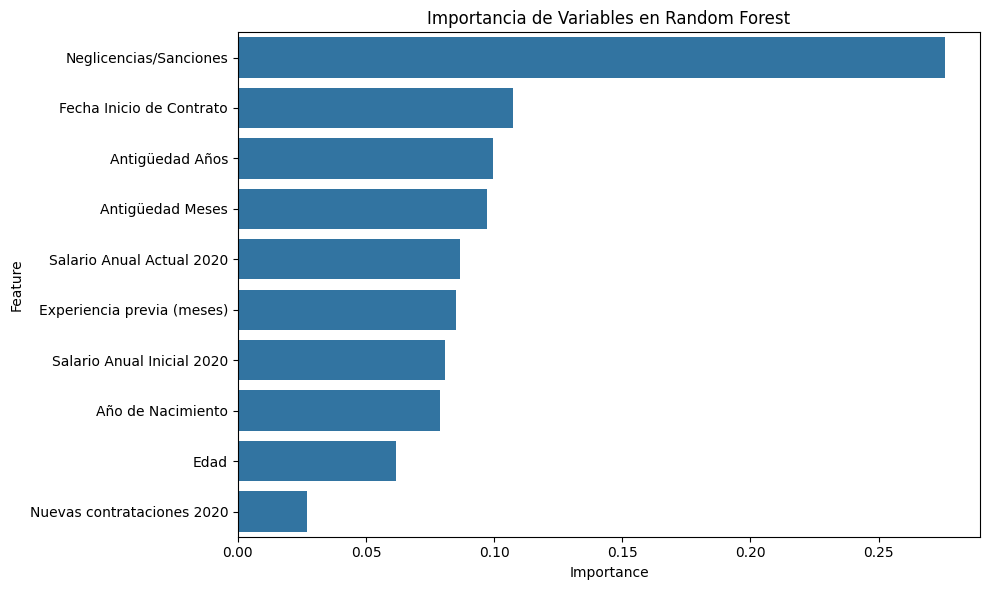

In [13]:
# Identificar mejor modelo
best_model_name = results_df.sort_values('F1 (CV)', ascending=False).iloc[0]['Modelo']
best_model = {'Regresión Logística': log_reg, 
              'Random Forest': rf_clf, 
              'Gradient Boosting': gb_clf}[best_model_name]

print(f"\nEl mejor modelo es: {best_model_name}")

# Para Random Forest o Gradient Boosting, podemos ver importancia de características
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    importance = pd.DataFrame({
        'Feature': important_features,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance)
    plt.title(f'Importancia de Variables en {best_model_name}')
    plt.tight_layout()
    plt.show()

In [14]:
import joblib

# Guardar el mejor modelo
# Crear un diccionario con toda la información necesaria
model_package = {
    'model': best_model,
    'scaler': scaler,
    'features': important_features
}

# Guardar el modelo en el directorio actual
model_filename = f"modelo_rotacion_externa_{best_model_name.replace(' ', '_').lower()}.pkl"
joblib.dump(model_package, model_filename)

print(f"Modelo guardado exitosamente como: {model_filename}")

Modelo guardado exitosamente como: modelo_rotacion_externa_random_forest.pkl
